In [1]:
import mode_decomp
from mode_decomp import *

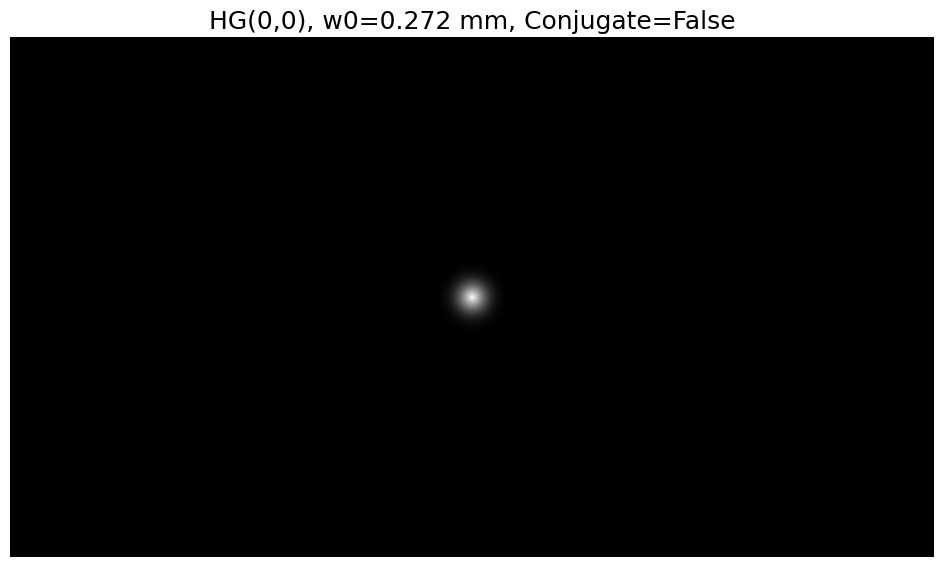

In [2]:
phi = generate_hg_hologram(0,0, 17*0.016, (0,0), Grating= False, Grating_period=(0, 50), conjugate=False, plot_output= True)

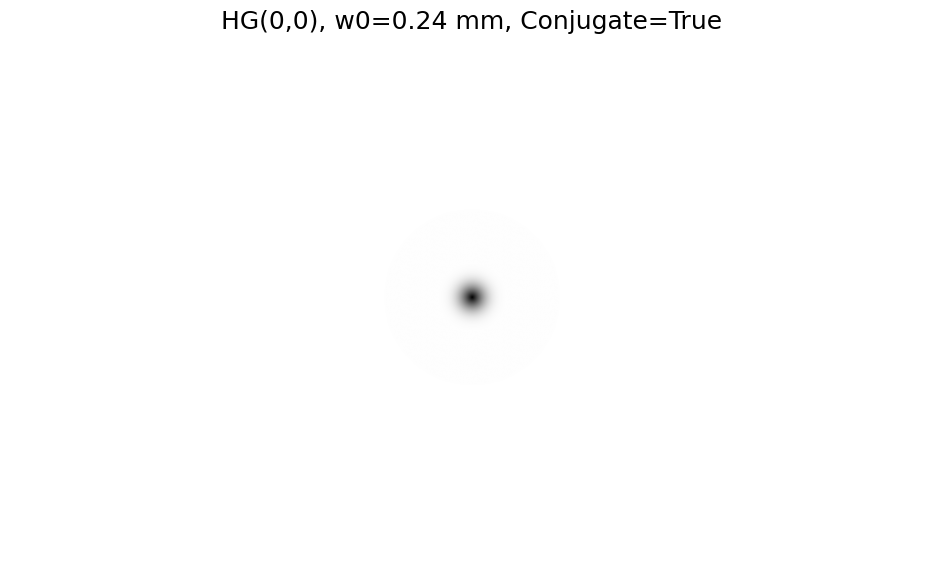

In [3]:
phi_star = generate_hg_hologram(0,0, 15*0.016, (0,0), Grating= False, Grating_period=(0, 50), conjugate=True, plot_output= True)

In [4]:
phi*phi_star

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

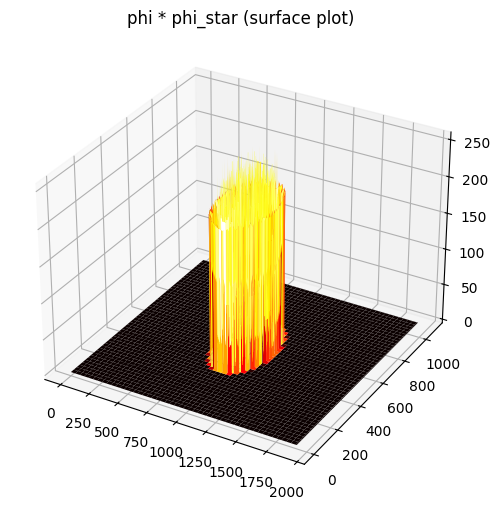

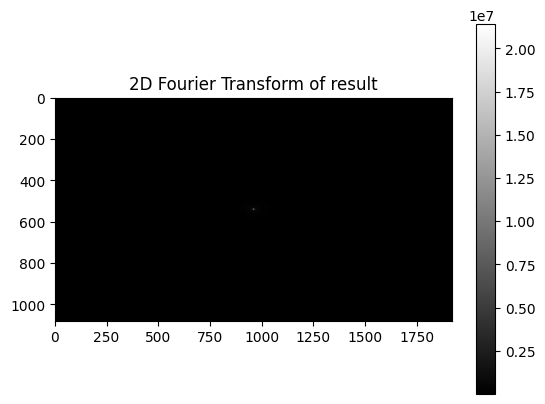

In [5]:
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.pyplot as plt
phi_star = generate_hg_hologram(0,0, 1.7, (0,0), Grating= False, Grating_period=(0, 50), conjugate=True, plot_output= False)
#horizontal_grating = partial_grating_phase(grating_period=3, coverage_fraction=1)
phi = generate_hg_hologram(0,0, 0.8, (0,0), Grating= False, Grating_period=(0, 50), conjugate=False, plot_output= False)

result = phi*phi_star
result = result.real  # Ensure the result is real for visualization
x = np.arange(result.shape[1])
y = np.arange(result.shape[0])
X, Y = np.meshgrid(x, y)
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, result, cmap='hot')
ax.set_title('phi * phi_star (surface plot)')
plt.show()

f_transform = np.fft.fftshift(np.fft.fft2(result))
plt.imshow(np.abs(f_transform), cmap='gray')
plt.title('2D Fourier Transform of result')
plt.colorbar()
plt.show()

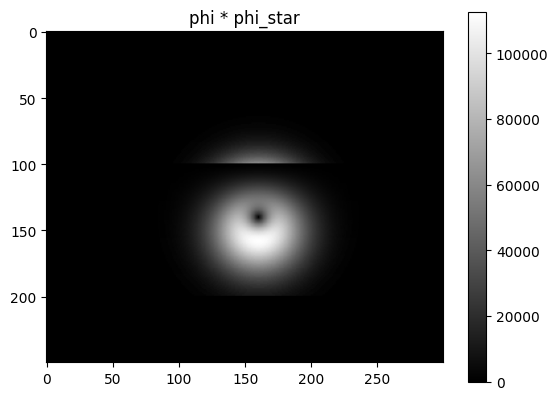

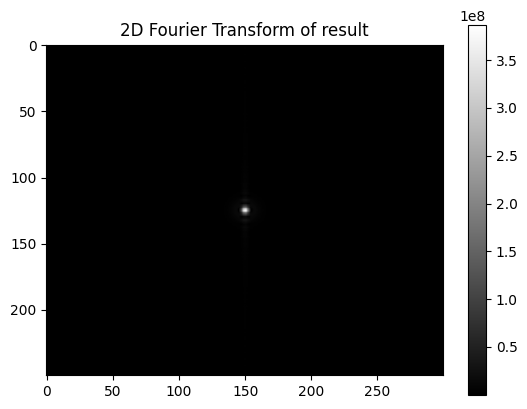

In [6]:
import matplotlib.pyplot as plt
phi_star = generate_hg_hologram(0,0, 7*0.016, (0,0), Grating= False, Grating_period=(0, 50), conjugate=True, plot_output= False)
horizontal_grating = partial_grating_phase(grating_period=100, coverage_fraction=1)
phi = generate_hg_hologram(0,0, 17*0.016, (0,0), Grating= False, Grating_period=(0, 50), conjugate=False, plot_output= False)

result = phi * horizontal_grating *phi_star
result = result.real  # Ensure the result is real for visualization
result = result[400:650,800:1100]
plt.imshow(result, cmap='gray')
plt.title('phi * phi_star')
plt.colorbar()
plt.show()

f_transform = np.fft.fftshift(np.fft.fft2(result))
plt.imshow(np.abs(f_transform), cmap='gray')
plt.title('2D Fourier Transform of result')
plt.colorbar()
plt.show()

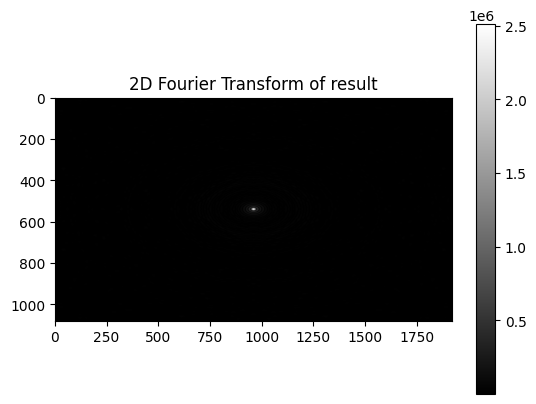

In [7]:
import matplotlib.pyplot as plt
phi_star = generate_hg_hologram(0,0, 1*0.016, (0,0), Grating= True, Grating_period=(0, 50), conjugate=True, plot_output= False)
phi = generate_hg_hologram(0,0, 17*0.016, (0,0), Grating= False, Grating_period=(0, 50), conjugate=False, plot_output= False)

result = phi * phi_star

f_transform = np.fft.fftshift(np.fft.fft2(result))
plt.imshow(np.abs(f_transform), cmap='gray')
plt.title('2D Fourier Transform of result')
plt.colorbar()
plt.show()

In [8]:
# Compute phi once
phi = generate_hg_hologram(
    0, 0, 0.272, (0,0),
    Grating=False, Grating_period=(0, 50),
    conjugate=False, plot_output=False
)

# Get max intensity across all beam sizes to fix scaling
beam_sizes = np.linspace(0.001, 0.544, 543)
max_val = 0
for w0 in beam_sizes:
    phi_star = generate_hg_hologram(
        0, 0, w0, (0,0),
        Grating=False, Grating_period=(0, 50),
        conjugate=True, plot_output=False
    )
    result = (phi * phi_star).real
    result = result[400:650, 800:1100]
    max_val = max(max_val, np.max(result))

# Prepare figure with fixed color limits
fig, ax = plt.subplots(figsize=(6,6), dpi=200)
im = ax.imshow(np.zeros((250, 300)), cmap='gray', 
               animated=True, interpolation='bilinear',
               vmin=0, vmax=max_val)   # fixed scaling
fig.colorbar(im, ax=ax)

def update(frame):
    w0 = beam_sizes[frame]
    phi_star = generate_hg_hologram(
        0, 0, w0, (0,0),
        Grating=False, Grating_period=(0, 50),
        conjugate=True, plot_output=False
    )
    result = (phi * phi_star).real
    result = result[400:650, 800:1100]
    im.set_array(result)
    ax.set_title(f'phi * phi_star (w0 = {w0:.3f}) ref = 0.272')
    return [im]

ani = FuncAnimation(fig, update, frames=len(beam_sizes), interval=200, blit=True)

ani.save("phi_phi_star_animation.mp4", writer="ffmpeg", fps=5, dpi=200)
plt.show()


KeyboardInterrupt: 

In [ ]:
# Compute phi once
phi = generate_hg_hologram(
    0, 0, 0.272, (0,0),
    Grating=False, Grating_period=(0, 50),
    conjugate=False, plot_output=False
)

# Get max intensity across all beam sizes to fix scaling
beam_sizes = np.linspace(0.001, 0.544, 543)
max_val = 0
for w0 in beam_sizes:
    phi_star = generate_hg_hologram(
        0, 0, w0, (0,0),
        Grating=False, Grating_period=(0, 50),
        conjugate=True, plot_output=False
    )
    result = (phi * phi_star).real
    result = result[400:650, 800:1100]
    max_val = max(max_val, np.max(result))

# Prepare figure with fixed color limits
fig, ax = plt.subplots(figsize=(6,6), dpi=200)
im = ax.imshow(np.zeros((250, 300)), cmap='gray', 
               animated=True, interpolation='nearest',
               vmin=0, vmax=max_val)   # fixed scaling
fig.colorbar(im, ax=ax)

def update(frame):
    w0 = beam_sizes[frame]
    phi_star = generate_hg_hologram(
        0, 0, w0, (0,0),
        Grating=False, Grating_period=(0, 50),
        conjugate=True, plot_output=False
    )
    result = (phi * phi_star).real
    result = result[400:650, 800:1100]
    
    im.set_array(result)
    ax.set_title(f'phi * phi_star (w0 = {w0:.3f}) ref = 0.272')
    return [im]

ani = FuncAnimation(fig, update, frames=len(beam_sizes), interval=200, blit=True)

ani.save("phi_phi_star_animation.mp4", writer="ffmpeg", fps=5, dpi=200)
plt.show()


0

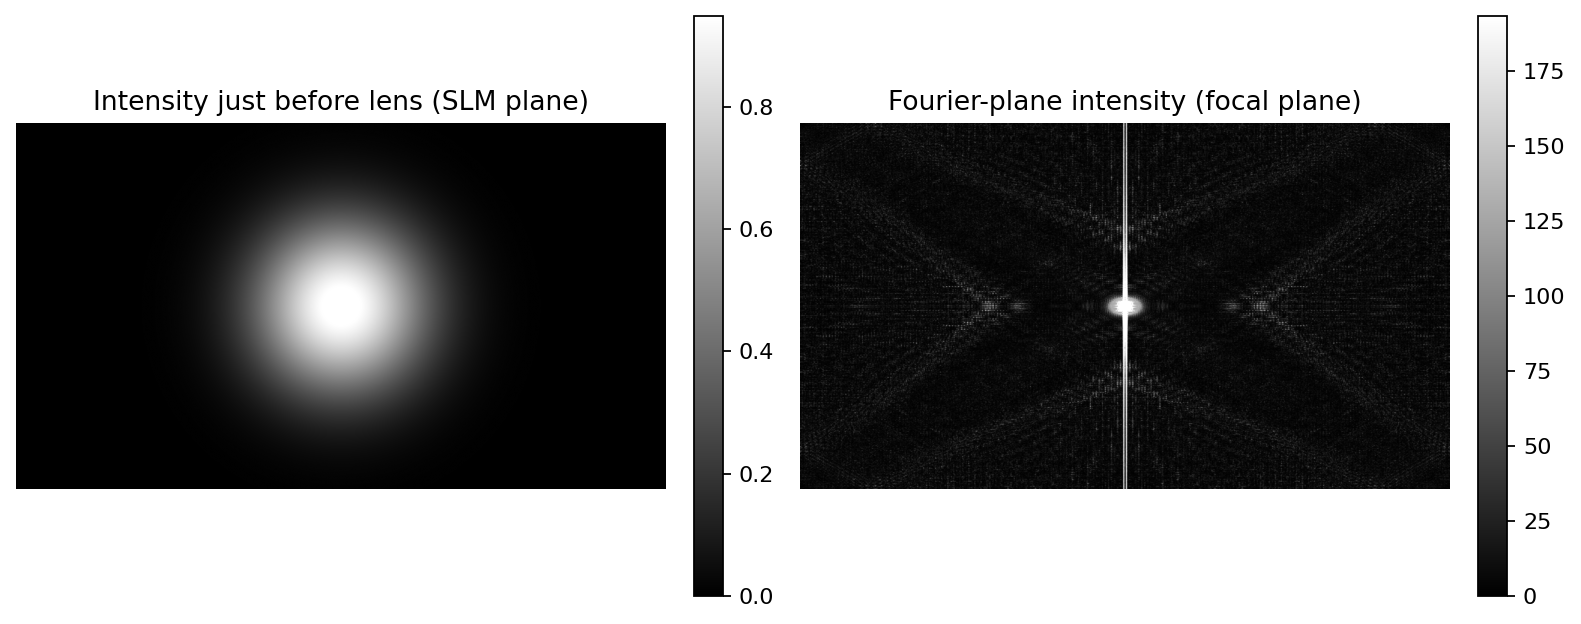

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------
# 1) Get your SLM phase mask (0–255) and convert to radians
# ---------------------------
phi_mask_255 = generate_hg_hologram(
    3, 3, 25*0.08, (1,0),
    Grating=False, Grating_period=(0,50),
    conjugate=True, plot_output=False
)
# Ensure array is 2D and numeric
phi_mask_255 = np.asarray(phi_mask_255)

# Map 0..255 -> 0..2π
phi_rad = (phi_mask_255.astype(np.float32) / 255.0) * (2*np.pi)

# ---------------------------
# 2) Build the incident Gaussian beam amplitude on the SLM grid
#    (choose a waist in pixels; tweak to match your real beam)
# ---------------------------
Ny, Nx = phi_rad.shape
yy, xx = np.meshgrid(np.arange(Ny) - Ny//2, np.arange(Nx) - Nx//2, indexing='ij')

# Pick a reasonable waist in pixels (adjust as needed)
w0_px = 250  # e.g., quarter of the smaller dimension
A = np.exp(- (xx**2 + yy**2) / (2*w0_px**2)).astype(np.float32)

# ---------------------------
# 3) Field just before the lens (SLM plane output)
#    E_slm = A * exp(i * phi)
# ---------------------------
E_slm = A * np.exp(1j * phi_rad)

# Intensity just before the lens
I_before = np.abs(E_slm)**2  # if mask is pure phase, this ~ A^2

# ---------------------------
# 4) Fourier-plane (focal plane) intensity via Fraunhofer (FFT)
#    E_fourier ∝ FFT{ E_slm }
# ---------------------------
E_fourier = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(E_slm)))
I_fourier = np.abs(E_fourier)**2

# ---------------------------
# 5) Plot with fixed scaling so background stays black
# ---------------------------
# Choose vmax from a percentile to avoid autoscale gray backgrounds
vmax_before  = np.percentile(I_before,  99.5)
vmax_fourier = np.percentile(I_fourier, 99.5)

fig, axs = plt.subplots(1, 2, figsize=(10, 4), dpi=160)

im0 = axs[0].imshow(I_before, cmap='gray', vmin=0, vmax= vmax_before, interpolation='bilinear')
axs[0].set_title('Intensity just before lens (SLM plane)')
axs[0].axis('off')
plt.colorbar(im0, ax=axs[0], fraction=0.046, pad=0.04)

im1 = axs[1].imshow(I_fourier, cmap='gray', vmin=0, vmax= vmax_fourier, interpolation='bilinear')
axs[1].set_title('Fourier-plane intensity (focal plane)')
axs[1].axis('off')
plt.colorbar(im1, ax=axs[1], fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()


In [36]:
import numpy as np
import math
from scipy.special import hermite, j1
import matplotlib.pyplot as plt

def generate_hologram_faithful(m, n, X, Y, w0, wavelength=633e-9, conjugate=True,
                               add_grating=True, grating_period_pixels=50):
    """
    A faithful replication of the user's original hologram algorithm.

    This version correctly includes the wavefront curvature by calculating the
    target beam at a small distance (z) from the waist, which is essential
    for the on-axis (gratingless) version of the algorithm to work.
    """
    # --- 1. Calculate Target Complex Field with Wavefront Curvature ---
    k = 2 * np.pi / wavelength
    zr = np.pi * w0**2 / wavelength # Rayleigh range

    # CRITICAL: Calculate at a small non-zero distance 'z' to include curvature
    z = zr * 0.1 # e.g., at 10% of the Rayleigh range
    
    w = w0 * np.sqrt(1 + (z/zr)**2)  # Beam size at z
    R = z * (1 + (zr/z)**2)       # Radius of curvature at z

    Hm = hermite(m)
    Hn = hermite(n)
    Hx = Hm(np.sqrt(2)*X/w)
    Hy = Hn(np.sqrt(2)*Y/w)
    
    # Gouy phase and spherical wavefront terms
    gouy_phase = (n + m + 1) * np.arctan(z/zr)
    spherical_phase = k * (X**2 + Y**2) / (2*R)
    
    # Full complex field
    HG_field = (Hx * Hy * np.exp(-(X**2 + Y**2)/w**2) *
                np.exp(-1j * spherical_phase) *
                np.exp(1j * gouy_phase))

    if conjugate:
        HG_field = np.conj(HG_field)

    # --- 2. Extract Amplitude and Phase ---
    A = np.abs(HG_field)
    A /= (A.max() if A.max() != 0 else 1.0)
    ph = np.angle(HG_field)

    # --- 3. Bessel J1 Inversion ---
    X0, J1_MAX = 1.84118378, 0.58186522
    _xs = np.linspace(0.0, X0, 4096)
    _ys = j1(_xs)
    _ys_mono = np.maximum.accumulate(_ys)
    F = np.interp(A * J1_MAX, _ys_mono, _xs)

    # --- 4. Create Hologram using User's Formula ---
    grating_phase = 0
    if add_grating:
        pixel_size = X[0,1] - X[0,0]
        grating_phase = (2 * np.pi * X) / (grating_period_pixels * pixel_size)
    
    Hol = F * np.sin(ph + grating_phase)
    
    # --- 5. Adapt for Simulation ---
    Hol -= Hol.min()
    Hol /= (Hol.max() if Hol.max() != 0 else 1.0)
    phase_mask = Hol * 2 * np.pi
    
    return phase_mask

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# --- Simulation Parameters ---
N = 512              # Number of grid points (NxN)
L = 5e-3             # Grid side length (meters)
dx = L / N           # Grid sampling interval (meters)
wavelength = 532e-9  # Wavelength of light (e.g., HeNe laser)
k = 2 * np.pi / wavelength # Wave number

# Propagation distance
z = 500e-2             # 5 cm

# --- Coordinate Grids ---
x = np.linspace(-L/2, L/2, N)
y = np.linspace(-L/2, L/2, N)
X, Y = np.meshgrid(x, y)

In [23]:
# --- Initial Gaussian Beam ---
w0 = 0.2e-3 # Beam waist radius (0.5 mm)
E_in = np.exp(-(X**2 + Y**2) / w0**2)

In [24]:
# --- SLM Phase Mask (Simple Linear Grating) ---
# This grating will deflect the beam primarily in the x-direction.
grating_period = 1000e-6 # 100 micrometers
phase_mask = (2 * np.pi * X / grating_period) % (2 * np.pi)
slm_mask = np.exp(1j * phase_mask)

# Apply the SLM to the beam
E_after_slm = E_in * slm_mask

phase_mask = (2 * np.pi * X / grating_period) % (2 * np.pi)
E_after_slm = E_in * np.exp(1j * phase_mask)
# This creates a binary grating (square wave phase 0, pi, 0, pi...)
phase = np.zeros_like(X)
phase[np.sin(2 * np.pi * X / grating_period) > 0] = np.pi
E_after_slm = E_in * np.exp(1j * phase)

In [25]:
# --- Propagation via Angular Spectrum Method ---

# 1. Fourier Transform the field
E_fft = np.fft.fft2(E_after_slm)
E_fft_shifted = np.fft.fftshift(E_fft) # Shift zero frequency to center

# 2. Define frequency coordinates
kx = 2 * np.pi * np.fft.fftfreq(N, d=dx)
ky = 2 * np.pi * np.fft.fftfreq(N, d=dx)
KX, KY = np.meshgrid(kx, ky)
KX_shifted = np.fft.fftshift(KX) # Shift to match E_fft_shifted
KY_shifted = np.fft.fftshift(KY)

# 3. Define the propagation kernel in frequency space
# This is the transfer function H(kx, ky)
kz = np.sqrt(k**2 - KX_shifted**2 - KY_shifted**2, dtype=complex)
H = np.exp(1j * z * kz)

# 4. Multiply in frequency domain and Inverse Fourier Transform
E_out_fft_shifted = E_fft_shifted * H
E_out_fft = np.fft.ifftshift(E_out_fft_shifted)
E_out = np.fft.ifft2(E_out_fft)

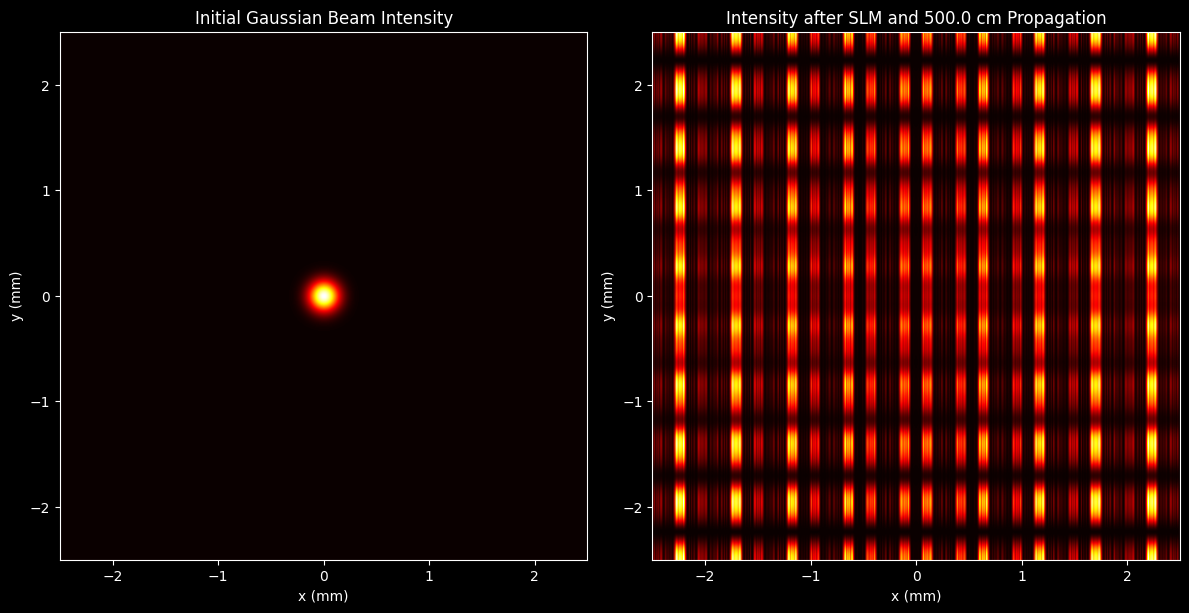

In [26]:
# --- Plotting ---
I_in = np.abs(E_in)**2
I_out = np.abs(E_out)**2

plt.style.use('dark_background')
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot initial beam
axs[0].imshow(I_in, cmap='hot', extent=[-L/2*1e3, L/2*1e3, -L/2*1e3, L/2*1e3])
axs[0].set_title('Initial Gaussian Beam Intensity')
axs[0].set_xlabel('x (mm)')
axs[0].set_ylabel('y (mm)')

# Plot propagated beam
axs[1].imshow(I_out, cmap='hot', extent=[-L/2*1e3, L/2*1e3, -L/2*1e3, L/2*1e3])
axs[1].set_title(f'Intensity after SLM and {z*100} cm Propagation')
axs[1].set_xlabel('x (mm)')
axs[1].set_ylabel('y (mm)')

plt.tight_layout()
plt.show()

To place the first order at L/4, the calculated grating period is: 38.0 um


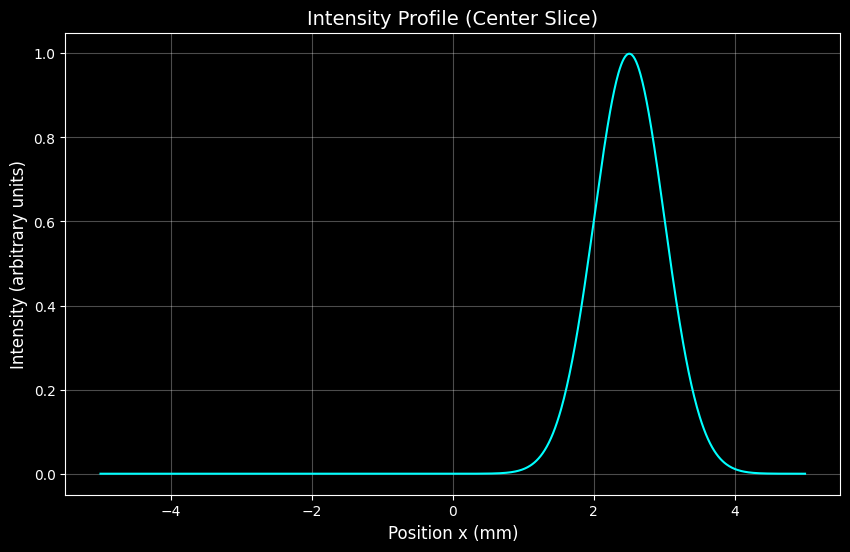

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# --- Simulation Parameters ---
N = 1024
L = 10e-3            # 10 mm grid
dx = L / N
wavelength = 633e-9
k = 2 * np.pi / wavelength
z = 15e-2            # Propagate for 15 cm

# --- Beam Parameters ---
w0 = 1e-3            # 1 mm beam radius

# --- CALCULATE the ideal grating period ---
# This is the key step to guarantee a visible pattern
grating_period = (4 * z * wavelength) / L
print(f"To place the first order at L/4, the calculated grating period is: {grating_period*1e6:.1f} um")


# --- Simulation Code ---
X, Y = np.meshgrid(np.linspace(-L/2, L/2, N), np.linspace(-L/2, L/2, N))
E_in = np.exp(-(X**2 + Y**2) / w0**2)
phase_mask = (2 * np.pi * X / grating_period) % (2 * np.pi)
E_after_slm = E_in * np.exp(1j * phase_mask)
# This creates a blazed grating (sawtooth phase)


E_fft = np.fft.fftshift(np.fft.fft2(E_after_slm))
kx = 2 * np.pi * np.fft.fftshift(np.fft.fftfreq(N, d=dx))
ky = 2 * np.pi * np.fft.fftshift(np.fft.fftfreq(N, d=dx)) # <-- This line is now correct
KX, KY = np.meshgrid(kx, ky)

kz = np.sqrt(k**2 - KX**2 - KY**2, dtype=complex)
H = np.exp(1j * z * kz)

E_out = np.fft.ifft2(np.fft.ifftshift(E_fft * H))
I_out = np.abs(E_out)**2

# --- Visualization ---
# A simple 1D slice shows the peaks clearly
plt.figure(figsize=(10, 6))
# Take a slice through the center of the beam
center_line = I_out[N // 2, :]
plt.plot(X[0, :] * 1e3, center_line, color='cyan')
plt.title('Intensity Profile (Center Slice)', fontsize=14)
plt.xlabel('Position x (mm)', fontsize=12)
plt.ylabel('Intensity (arbitrary units)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

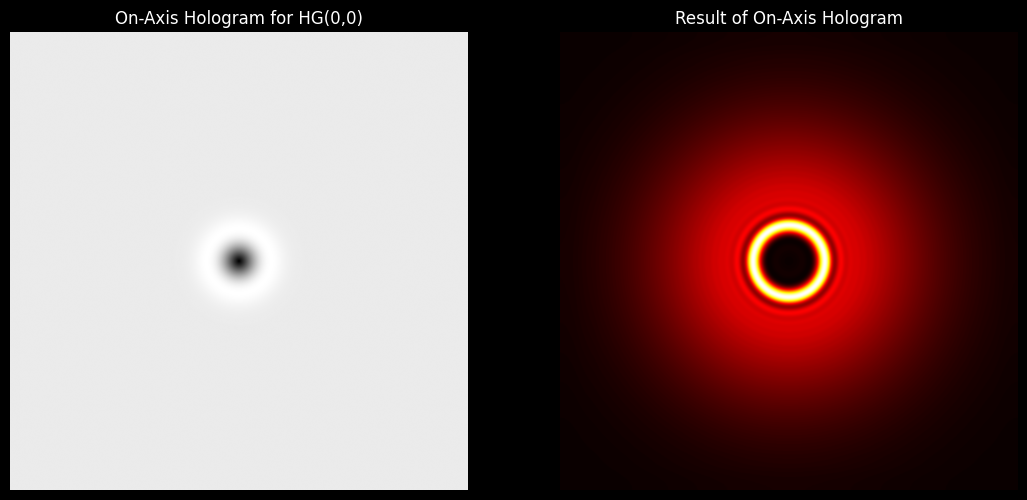

In [40]:
# --- Simulation Setup ---
N = 1024
L = 10e-3
dx = L / N
wavelength = 633e-9
z_prop = 40e-2 # Propagation distance

X, Y = np.meshgrid(np.linspace(-L/2, L/2, N), np.linspace(-L/2, L/2, N))

# --- 1. Input beam ---
w_in = 4e-3
E_in = np.exp(-(X**2 + Y**2) / w_in**2)

# --- 2. Generate the HG(0,0) ON-AXIS hologram ---
m, n = 0, 0
w_target = 1e-3
# Call the new function with the grating turned OFF
hg_phase_mask = generate_hologram_faithful(m, n, X, Y, w0=w_target/2, add_grating=False)

# --- 3. Apply phase mask and propagate ---
E_after_slm = E_in * np.exp(1j * hg_phase_mask)

# (Propagation code is the same)
E_fft = np.fft.fftshift(np.fft.fft2(E_after_slm))
k = 2 * np.pi / wavelength
# ... (rest of propagation code)
kx = 2*np.pi*np.fft.fftshift(np.fft.fftfreq(N,d=dx))
ky = 2*np.pi*np.fft.fftshift(np.fft.fftfreq(N,d=dx))
KX, KY = np.meshgrid(kx, ky)
kz = np.sqrt(k**2-KX**2-KY**2, dtype=complex)
H = np.exp(1j*z_prop*kz)
E_out = np.fft.ifft2(np.fft.ifftshift(E_fft*H))
I_out = np.abs(E_out)**2


# --- 4. Visualize the results ---
fig, axs = plt.subplots(1, 2, figsize=(13, 6))

axs[0].imshow(hg_phase_mask, cmap='gray')
axs[0].set_title(f'On-Axis Hologram for HG({m},{n})')
axs[0].set_axis_off()

axs[1].imshow(I_out, cmap='hot')
axs[1].set_title(f'Result of On-Axis Hologram')
axs[1].set_axis_off()
plt.show()

Saving animation to 'hg_beam_animation.mp4'. This may take a while...
Calculating frame 1/2...
Calculating frame 1/2...
Calculating frame 2/2...
...Done saving.
Calculating frame 1/2...


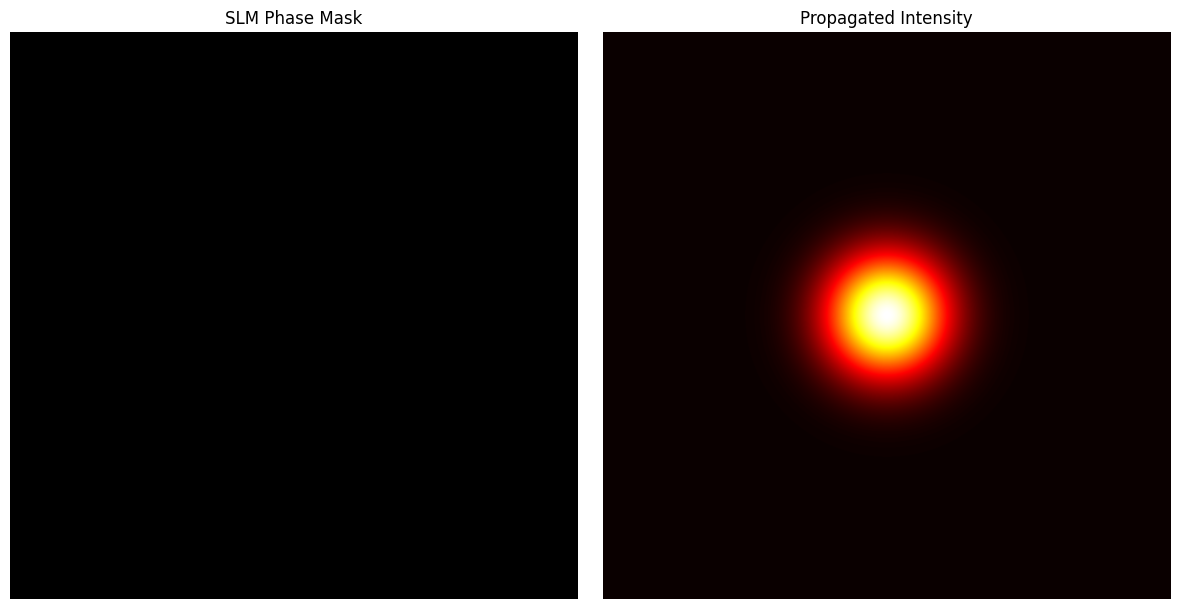

In [1]:
import numpy as np
import math
from scipy.special import hermite, j1
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# --- Paste the Faithful Hologram Function Here ---
def generate_hologram_faithful(m, n, X, Y, w0, wavelength=532e-9, conjugate=True,
                               add_grating=True, grating_period_pixels=50):
    """
    A faithful replication of the user's original hologram algorithm.
    """
    # Handle the case where w0 is zero or very small to avoid division errors
    if w0 < 1e-9:
        return np.zeros_like(X) # Return a blank mask for w0=0

    # --- 1. Calculate Target Complex Field with Wavefront Curvature ---
    k = 2 * np.pi / wavelength
    zr = np.pi * w0**2 / wavelength
    z = zr * 0.1
    w = w0 * np.sqrt(1 + (z/zr)**2)
    R = z * (1 + (zr/z)**2)
    Hm = hermite(m)
    Hn = hermite(n)
    Hx = Hm(np.sqrt(2)*X/w)
    Hy = Hn(np.sqrt(2)*Y/w)
    gouy_phase = (n + m + 1) * np.arctan(z/zr)
    spherical_phase = k * (X**2 + Y**2) / (2*R)
    HG_field = (Hx * Hy * np.exp(-(X**2 + Y**2)/w**2) *
                np.exp(-1j * spherical_phase) *
                np.exp(1j * gouy_phase))
    if conjugate:
        HG_field = np.conj(HG_field)

    # --- 2. Extract Amplitude and Phase ---
    A = np.abs(HG_field)
    A /= (A.max() if A.max() != 0 else 1.0)
    ph = np.angle(HG_field)

    # --- 3. Bessel J1 Inversion ---
    X0, J1_MAX = 1.84118378, 0.58186522
    _xs = np.linspace(0.0, X0, 4096)
    _ys = j1(_xs)
    _ys_mono = np.maximum.accumulate(_ys)
    F = np.interp(A * J1_MAX, _ys_mono, _xs)

    # --- 4. Create Hologram ---
    grating_phase = 0
    if add_grating:
        pixel_size = X[0,1] - X[0,0]
        grating_phase = (2 * np.pi * X) / (grating_period_pixels * pixel_size)
    Hol = F * np.sin(ph + grating_phase)

    # --- 5. Adapt for Simulation ---
    Hol -= Hol.min()
    Hol /= (Hol.max() if Hol.max() != 0 else 1.0)
    phase_mask = Hol * 2 * np.pi
    return phase_mask

# --- Simulation and Animation Setup ---
# Basic parameters
N = 1024 # Reduced N for faster animation
L = 10e-3
dx = L / N
wavelength = 532e-9
z_prop = 40e-2
k = 2 * np.pi / wavelength

# Coordinate grids
X, Y = np.meshgrid(np.linspace(-L/2, L/2, N), np.linspace(-L/2, L/2, N))

# Pre-calculate the propagation kernel (H) since it doesn't change
kx = 2*np.pi*np.fft.fftshift(np.fft.fftfreq(N,d=dx))
ky = 2*np.pi*np.fft.fftshift(np.fft.fftfreq(N,d=dx))
KX, KY = np.meshgrid(kx, ky)
kz = np.sqrt(k**2-KX**2-KY**2, dtype=complex)
H = np.exp(1j*z_prop*kz)

# Input beam
w_in = 1.5e-3
E_in = np.exp(-(X**2 + Y**2) / w_in**2)

# Animation parameters
num_frames = 2
target_w0_final = 1.5e-3 # The "required size" in mm
m, n = 0, 0 # Let's animate a more interesting HG(0,0) mode

# --- Set up the plot for animation ---
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
# Placeholder data for the first frame
im1 = axs[0].imshow(np.zeros_like(X), cmap='gray', animated=True)
axs[0].set_title('SLM Phase Mask')
axs[0].set_axis_off()

im2 = axs[1].imshow(np.zeros_like(X), cmap='hot', animated=True)
axs[1].set_title('Propagated Intensity')
axs[1].set_axis_off()

fig.tight_layout()

# --- Animation Update Function ---
# This function is called once for each frame of the animation.
def update(frame):
    # Calculate the current target waist size for this frame
    current_w0 = (frame / (num_frames - 1)) * (2 * target_w0_final)
    
    # Give user feedback on progress in the console
    print(f"Calculating frame {frame + 1}/{num_frames}...")
    
    # 1. Generate the hologram for the current waist size
    phase_mask = generate_hologram_faithful(m, n, X, Y, w0=current_w0, add_grating=False)
    
    # 2. Apply the phase mask and propagate
    E_after_slm = E_in * np.exp(1j * phase_mask)
    E_fft = np.fft.fftshift(np.fft.fft2(E_after_slm))
    E_out = np.fft.ifft2(np.fft.ifftshift(E_fft*H))
    I_out = np.abs(E_out)**2
    
    # 3. Update the plot data
    im1.set_data(phase_mask)
    im2.set_data(I_out)
    # im2.set_clim(0, I_out.max()) # Rescale colorbar each frame for best visibility
    im1.set_clim(0, 2 * np.pi) 
    im2.set_clim(0, I_out.max())
    #fig.title(f'Frame: {frame+1}/{num_frames} | Target Waist w0: {current_w0*1e3:.2f} mm', fontsize=14)
    
    # When blit=False, you don't need to return artists, but it's good practice
    return im1, im2

# --- Create Animation Object ---
# We use blit=False to ensure compatibility, as the title is changing.
ani = animation.FuncAnimation(fig, update, frames=num_frames, blit=False)

# --- SAVE THE ANIMATION TO A FILE ---
# This will take several minutes to process all the frames.
# Make sure you have a video encoder like ffmpeg installed!
print("Saving animation to 'hg_beam_animation.mp4'. This may take a while...")
ani.save('hg_beam_animation.mp4', writer='ffmpeg', fps=30, dpi=150)
print("...Done saving.")

# If you want to try and view it live instead of saving, comment out
# the ani.save() lines and uncomment the plt.show() line below.
# This will likely be very slow or unresponsive.
# plt.show()

In [2]:
beams_to_simulate = [
        (0, 0),
    ]

    # Define simulation and animation parameters
simulation_parameters = (
        1024,        # N: Grid size
        8e-3,      # L: Grid physical length
        532e-9,     # wavelength
        15e-2,      # z_prop: Propagation distance
        4e-3       # w_in: Input beam waist
    )
animation_parameters = (
       400,        # num_frames: Fewer frames for quicker testing
        4e-3,      # W on SLM (goes from 0 W to 2 W)
        30,         # fps
        150         # dpi
    )

In [ ]:
# --- WORKER FUNCTION: Now accepts a 'position' for its progress bar ---
from concurrent.futures import ThreadPoolExecutor
from tqdm.notebook import tqdm
# --- New Worker: ONLY calculates frames, does NOT save ---
def calculate_all_frames(args):
    """
    This is the new, lighter worker function. It only does the CPU-heavy
    calculations and returns the raw data for all frames.
    """
    m, n, sim_params, anim_params = args
    N, L, wavelength, z_prop, w_in = sim_params
    num_frames, target_w0_final, _, _ = anim_params # fps/dpi not needed here

    # Setup simulation grid and propagation kernel
    dx = L / N; k = 2 * np.pi / wavelength
    X, Y = np.meshgrid(np.linspace(-L/2, L/2, N), np.linspace(-L/2, L/2, N))
    kx=2*np.pi*np.fft.fftshift(np.fft.fftfreq(N,d=dx)); ky=2*np.pi*np.fft.fftshift(np.fft.fftfreq(N,d=dx))
    KX,KY=np.meshgrid(kx,ky); kz=np.sqrt(k**2-KX**2-KY**2,dtype=complex); H=np.exp(1j*z_prop*kz)
    E_in = np.exp(-(X**2 + Y**2) / w_in**2)

    all_frames_data = []
    # This tqdm progress bar now just tracks the calculation
    frame_iterator = tqdm(range(num_frames), desc=f'Calculating HG({m},{n})', leave=False)
    for frame in frame_iterator:
        current_w0 = (frame / (num_frames - 1)) * (1.5 * target_w0_final)
        phase_mask = generate_hologram_faithful(m, n, X, Y, w0=current_w0, add_grating=False)
        E_after_slm = E_in * np.exp(1j * phase_mask)
        E_fft = np.fft.fftshift(np.fft.fft2(E_after_slm))
        E_out = np.fft.ifft2(np.fft.ifftshift(E_fft*H))
        I_out = np.abs(E_out)**2
        all_frames_data.append((phase_mask, I_out))
    
    # Return the raw data along with parameters needed for saving
    
    return (m, n, all_frames_data)

# --- New Main Function: Runs calculation in parallel, then saves sequentially ---
def run_parallel_simulations(beams_to_simulate, sim_params, anim_params):
    """
    Orchestrates the simulation by first calculating all frame data in
    parallel, and then saving the resulting animations sequentially.
    """
    N, _, _, _, _ = sim_params
    num_frames, target_w0_final, fps, dpi = anim_params
    
    tasks = [(m, n, sim_params, anim_params) for m, n in beams_to_simulate]
    all_calculated_data = []

    # --- Part 1: Parallel Calculation ---
    print("--- Starting Parallel Frame Calculation ---")
    with ThreadPoolExecutor() as executor:
        # The first tqdm bar tracks the calculation process
        results_iterator = tqdm(executor.map(calculate_all_frames, tasks), total=len(tasks), desc="Calculating Beams")
        all_calculated_data = list(results_iterator)
    print("--- All Frame Calculations Complete ---")

    # --- Part 2: Sequential Saving ---
    print("\n--- Starting Sequential Animation Saving ---")
    # The second tqdm bar tracks the saving process
    saving_iterator = tqdm(all_calculated_data, total=len(all_calculated_data), desc="Saving Videos")
    for m, n, frames_data in saving_iterator:
        fig = plt.figure(figsize=(11, 6), constrained_layout=True)
        axs = fig.subplots(1, 2)
        im1 = axs[0].imshow(np.zeros((N, N)), cmap='gray', vmin=0, vmax=2*np.pi)
        im2 = axs[1].imshow(np.zeros((N, N)), cmap='hot')
        
        def update(frame):
            phase_mask, I_out = frames_data[frame]
            current_w0 = (frame / (num_frames - 1)) * (1.5 * target_w0_final)
            fig.suptitle(f'Hologram Generation for HG({m},{n})', fontsize=16)
            im1.set_data(phase_mask)
            axs[0].set_title(f'SLM Phase Mask (w₀={current_w0*1e3:.2f} mm)', fontsize=10); axs[0].set_axis_off()
            im2.set_data(I_out)
            if I_out.max() > 0: im2.set_clim(0, I_out.max())
            axs[1].set_title(f'Propagated Intensity (Frame {frame+1})', fontsize=10); axs[1].set_axis_off()
            return im1, im2

        ani = animation.FuncAnimation(fig, update, frames=num_frames, blit=False)
        output_filename = f'hg_animation_m{m}_n{n}.mp4'
        ani.save(output_filename, writer='ffmpeg', fps=fps, dpi=dpi)
        plt.close(fig) # IMPORTANT: Close the figure to free up memory

    print("--- All Videos Saved ---")

In [4]:
print(f"Starting simulations for {len(beams_to_simulate)} beams...")
run_parallel_simulations(beams_to_simulate, simulation_parameters, animation_parameters)
print("All simulations completed.")

Starting simulations for 1 beams...
--- Starting Parallel Frame Calculation ---


Calculating Beams:   0%|          | 0/1 [00:00<?, ?it/s]

Calculating HG(0,0):   0%|          | 0/400 [00:00<?, ?it/s]

--- All Frame Calculations Complete ---

--- Starting Sequential Animation Saving ---


Saving Videos:   0%|          | 0/1 [00:00<?, ?it/s]

--- All Videos Saved ---
All simulations completed.


Saving animation to 'hg_beam_animation.mp4'. This may take a while...
Calculating frame 1/400...
Calculating frame 1/400...
Calculating frame 2/400...
Calculating frame 3/400...
Calculating frame 4/400...
Calculating frame 5/400...
Calculating frame 6/400...
Calculating frame 7/400...
Calculating frame 8/400...
Calculating frame 9/400...
Calculating frame 10/400...
Calculating frame 11/400...
Calculating frame 12/400...
Calculating frame 13/400...
Calculating frame 14/400...
Calculating frame 15/400...
Calculating frame 16/400...
Calculating frame 17/400...
Calculating frame 18/400...
Calculating frame 19/400...
Calculating frame 20/400...
Calculating frame 21/400...
Calculating frame 22/400...
Calculating frame 23/400...
Calculating frame 24/400...
Calculating frame 25/400...
Calculating frame 26/400...
Calculating frame 27/400...
Calculating frame 28/400...
Calculating frame 29/400...
Calculating frame 30/400...
Calculating frame 31/400...
Calculating frame 32/400...
Calculating fram

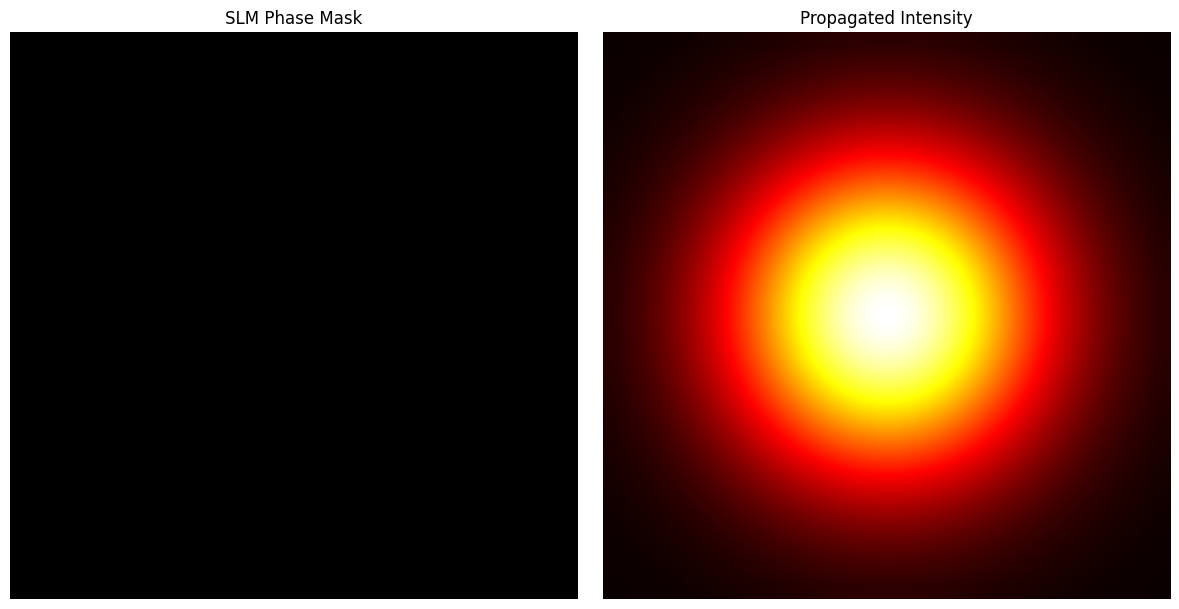

In [ ]:
import numpy as np
import math
from scipy.special import hermite, j1
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# --- Paste the Faithful Hologram Function Here ---
def generate_hologram_faithful(m, n, X, Y, w0, wavelength=532e-9, conjugate=True,
                               add_grating=True, grating_period_pixels=50):
    """
    A faithful replication of the user's original hologram algorithm.
    """
    # Handle the case where w0 is zero or very small to avoid division errors
    if w0 < 1e-9:
        return np.zeros_like(X) # Return a blank mask for w0=0

    # --- 1. Calculate Target Complex Field with Wavefront Curvature ---
    k = 2 * np.pi / wavelength
    zr = np.pi * w0**2 / wavelength
    z = zr * 0.1
    w = w0 * np.sqrt(1 + (z/zr)**2)
    R = z * (1 + (zr/z)**2)
    Hm = hermite(m)
    Hn = hermite(n)
    Hx = Hm(np.sqrt(2)*X/w)
    Hy = Hn(np.sqrt(2)*Y/w)
    gouy_phase = (n + m + 1) * np.arctan(z/zr)
    spherical_phase = k * (X**2 + Y**2) / (2*R)
    HG_field = (Hx * Hy * np.exp(-(X**2 + Y**2)/w**2) *
                np.exp(-1j * spherical_phase) *
                np.exp(1j * gouy_phase))
    if conjugate:
        HG_field = np.conj(HG_field)

    # --- 2. Extract Amplitude and Phase ---
    A = np.abs(HG_field)
    A /= (A.max() if A.max() != 0 else 1.0)
    ph = np.angle(HG_field)

    # --- 3. Bessel J1 Inversion ---
    X0, J1_MAX = 1.84118378, 0.58186522
    _xs = np.linspace(0.0, X0, 4096)
    _ys = j1(_xs)
    _ys_mono = np.maximum.accumulate(_ys)
    F = np.interp(A * J1_MAX, _ys_mono, _xs)

    # --- 4. Create Hologram ---
    grating_phase = 0
    if add_grating:
        pixel_size = X[0,1] - X[0,0]
        grating_phase = (2 * np.pi * X) / (grating_period_pixels * pixel_size)
    Hol = F * np.sin(ph + grating_phase)

    # --- 5. Adapt for Simulation ---
    Hol -= Hol.min()
    Hol /= (Hol.max() if Hol.max() != 0 else 1.0)
    phase_mask = Hol * 2 * np.pi
    return phase_mask

# --- Simulation and Animation Setup ---
# Basic parameters
N = 1024 # Reduced N for faster animation
L = 10e-3
dx = L / N
wavelength = 532e-9
z_prop = 40e-2
k = 2 * np.pi / wavelength

# Coordinate grids
X, Y = np.meshgrid(np.linspace(-L/2, L/2, N), np.linspace(-L/2, L/2, N))

# Pre-calculate the propagation kernel (H) since it doesn't change
kx = 2*np.pi*np.fft.fftshift(np.fft.fftfreq(N,d=dx))
ky = 2*np.pi*np.fft.fftshift(np.fft.fftfreq(N,d=dx))
KX, KY = np.meshgrid(kx, ky)
kz = np.sqrt(k**2-KX**2-KY**2, dtype=complex)
H = np.exp(1j*z_prop*kz)

# Input beam
w_in = 4e-3
E_in = np.exp(-(X**2 + Y**2) / w_in**2)

# Animation parameters
num_frames = 400
target_w0_final = 4e-3 # The "required size" in mm
m, n = 0, 0 # Let's animate a more interesting HG(0,0) mode

# --- Set up the plot for animation ---
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
# Placeholder data for the first frame
im1 = axs[0].imshow(np.zeros_like(X), cmap='gray', animated=True)
axs[0].set_title('SLM Phase Mask')
axs[0].set_axis_off()

im2 = axs[1].imshow(np.zeros_like(X), cmap='hot', animated=True)
axs[1].set_title('Propagated Intensity')
axs[1].set_axis_off()

fig.tight_layout()

# --- Animation Update Function ---
# This function is called once for each frame of the animation.
intensity_array = []
def update(frame):
    # Calculate the current target waist size for this frame
    current_w0 = (frame / (num_frames - 1)) * (1.5 * target_w0_final)
    
    # Give user feedback on progress in the console
    print(f"Calculating frame {frame + 1}/{num_frames}...")
    
    # 1. Generate the hologram for the current waist size
    phase_mask = generate_hologram_faithful(m, n, X, Y, w0=current_w0, add_grating=False)
    
    # 2. Apply the phase mask and propagate
    E_after_slm = E_in * np.exp(1j * phase_mask)
    
    E_fft = np.fft.fftshift(np.fft.fft2(E_after_slm))
    E_out = np.fft.ifft2(np.fft.ifftshift(E_fft*H))
    I_out = np.abs(E_out)**2
    intensity_array.append(np.mean(I_out))
    
    # 3. Update the plot data
    im1.set_data(phase_mask)
    im2.set_data(I_out)
    # im2.set_clim(0, I_out.max()) # Rescale colorbar each frame for best visibility
    im1.set_clim(0, 2 * np.pi) 
    im2.set_clim(0, I_out.max())
    #fig.title(f'Frame: {frame+1}/{num_frames} | Target Waist w0: {current_w0*1e3:.2f} mm', fontsize=14)
    
    # When blit=False, you don't need to return artists, but it's good practice
    return im1, im2

# --- Create Animation Object ---
# We use blit=False to ensure compatibility, as the title is changing.
ani = animation.FuncAnimation(fig, update, frames=num_frames, blit=False)

# --- SAVE THE ANIMATION TO A FILE ---
# This will take several minutes to process all the frames.
# Make sure you have a video encoder like ffmpeg installed!
print("Saving animation to 'hg_beam_animation.mp4'. This may take a while...")
ani.save('hg_beam_animation.mp4', writer='ffmpeg', fps=30, dpi=150)
print("...Done saving.")

# If you want to try and view it live instead of saving, comment out
# the ani.save() lines and uncomment the plt.show() line below.
# This will likely be very slow or unresponsive.
# plt.show()

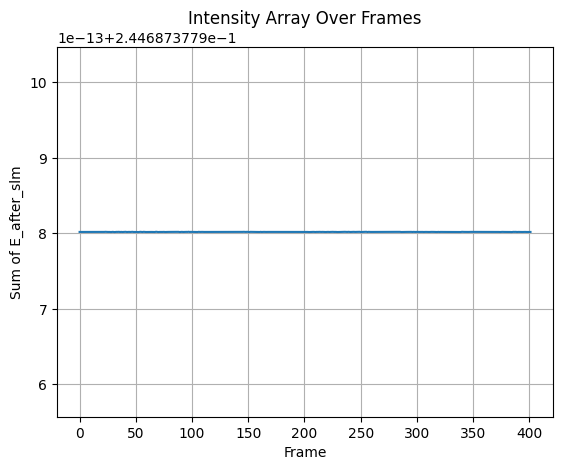

0.24468737788780182

In [14]:
import matplotlib.pyplot as plt

plt.plot(intensity_array)
plt.xlabel('Frame')
plt.ylabel('Sum of E_after_slm')
plt.title('Intensity Array Over Frames')
plt.grid(True)
plt.show()

intensity_array[0].real